In [1]:
from vega_datasets import data
import numpy as np
df = data.sf_temps()
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math
from pprint import pprint
import requests

Convert date column to datetime format.

In [2]:
grocery = pd.read_csv('oslin_merge_total.csv')

In [3]:
grocery.sale_date.dtype

dtype('O')

In [4]:
grocery.sale_date.head()

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
3    Fri, 04 Jan 2013 00:00:00 GMT
4    Sat, 05 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [5]:
grocery['sale_date'] = pd.to_datetime(grocery['sale_date'])
grocery.head()

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,0,1,13.0,2013-01-01 00:00:00+00:00,1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,1,11.0,2013-01-02 00:00:00+00:00,2,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,2,1,14.0,2013-01-03 00:00:00+00:00,3,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,3,1,13.0,2013-01-04 00:00:00+00:00,4,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,4,1,10.0,2013-01-05 00:00:00+00:00,5,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


Plot the distribution of sale_amount, item_price and sale_date.

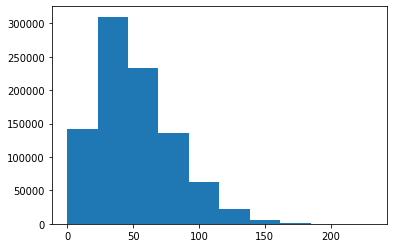

In [13]:
plt.hist(grocery.sale_amount)
plt.show()

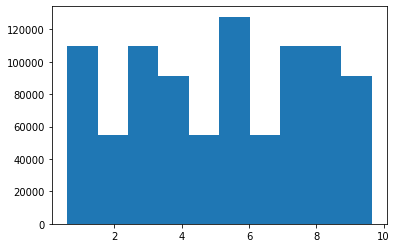

In [14]:
plt.hist(grocery.item_price)
plt.show()

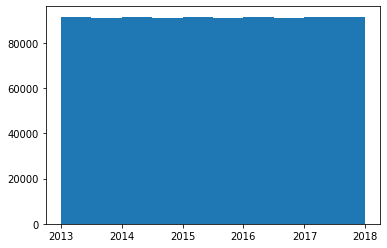

In [17]:
plt.hist(grocery.index)
plt.show()

Set the index to be the datetime variable.

In [6]:
grocery = grocery.sort_values('sale_date').set_index('sale_date')
grocery.head()

,Unnamed: 0,item,sale_amount,sale_id,store,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,211816,17,26.0,295813,3,16,16.0,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,832656,7,32.0,125995,10,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01 00:00:00+00:00,213642,18,45.0,314073,3,17,17.0,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,215468,19,34.0,332333,3,18,18.0,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [9]:
grocery['month'] = grocery.index.month
grocery['Weekday Name'] = grocery.index.weekday_name
grocery.head()

,Unnamed: 0,item,sale_amount,sale_id,store,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,Weekday Name
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday
2013-01-01 00:00:00+00:00,211816,17,26.0,295813,3,16,16.0,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday
2013-01-01 00:00:00+00:00,832656,7,32.0,125995,10,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday
2013-01-01 00:00:00+00:00,213642,18,45.0,314073,3,17,17.0,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday
2013-01-01 00:00:00+00:00,215468,19,34.0,332333,3,18,18.0,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday


Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [11]:
grocery['sales_total'] = grocery.sale_amount * grocery.item_price
grocery.head()

,Unnamed: 0,item,sale_amount,sale_id,store,level_0,index,item_brand,item_id,item_name,...,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,Weekday Name,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,...,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,211816,17,26.0,295813,3,16,16.0,Ducal,17,Ducal Refried Red Beans,...,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,30.16
2013-01-01 00:00:00+00:00,832656,7,32.0,125995,10,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,...,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,308.48
2013-01-01 00:00:00+00:00,213642,18,45.0,314073,3,17,17.0,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,...,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,197.55
2013-01-01 00:00:00+00:00,215468,19,34.0,332333,3,18,18.0,Careone,19,Careone Family Comb Set - 8 Ct,...,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,25.16


Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [19]:
grocery['diff_from_last_day'] = grocery.sales_total.diff()
grocery.head()

,Unnamed: 0,item,sale_amount,sale_id,store,level_0,index,item_brand,item_id,item_name,...,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,Weekday Name,sales_total,diff_from_last_day
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,...,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,211816,17,26.0,295813,3,16,16.0,Ducal,17,Ducal Refried Red Beans,...,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,30.16,19.24
2013-01-01 00:00:00+00:00,832656,7,32.0,125995,10,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,...,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,Tuesday,308.48,278.32
2013-01-01 00:00:00+00:00,213642,18,45.0,314073,3,17,17.0,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,...,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,197.55,-110.93
2013-01-01 00:00:00+00:00,215468,19,34.0,332333,3,18,18.0,Careone,19,Careone Family Comb Set - 8 Ct,...,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,Tuesday,25.16,-172.39


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.